### Завдання 1
Використовуючи дані із файлу student_scores.csv побудуйте модель простої регресії для знаходження залежності між значеннями протяжності навчання і середнього балу студентів. Оцініть якість отриманої регресії.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

from pylab import rcParams
rcParams['figure.figsize'] = 8,6

In [13]:
stud = pd.read_csv('student_scores.csv')
stud.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


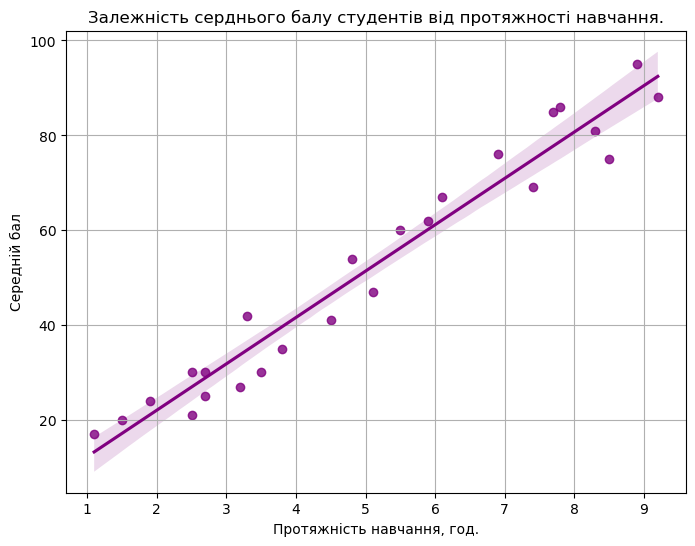

In [14]:
hours = stud['Hours']
scores = stud['Scores']
sb.regplot(x=hours, y=scores, data=stud, color='purple').set(title=f'Залежність серднього балу студентів від протяжності навчання.',
                                                        xlabel='Протяжність навчання, год.',
                                                        ylabel='Середній бал')
plt.grid()

In [15]:
X = np.array(hours).reshape(-1, 1)
y = np.array(scores).reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
print(f'B0 = {model.intercept_[0]:.2f}, B1 = {model.coef_[0,0]:.2f}')

B0 = 2.48, B1 = 9.78


**Точка перетину осі y при x = 0 визначається параметром В0 = 2.48  
Нахил лінії регресії для регресора 'Протяжність навчання' визначається параметром В1 = 9.78.**

In [16]:
print(model.score(X, y))

0.9529481969048356


**Отриманий коефіціент $R^2 = 0.95$ що наближується до 1, тому ми можемо стверджувати, що модель досить точно описує реальну залежність.  
Прогнози з використанням такої моделі будуть достатньо достовірними.**

**Спрогнозуємо певні результати за допомогою побудованої моделі:**

In [17]:
y_act = y
y_pred = model.predict(X)
y_pred[:5]

array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527]])

**Графічне відображення прогнозованих результатів:**

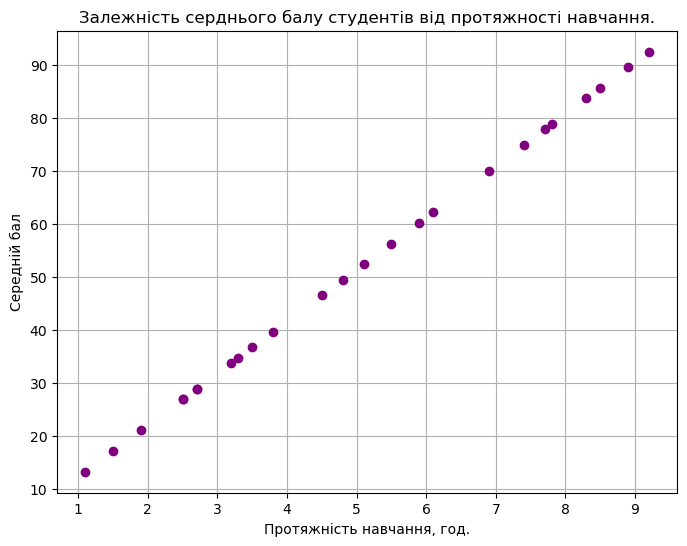

In [18]:
plt.plot(X, y_pred, 'o', color='purple')
plt.title('Залежність серднього балу студентів від протяжності навчання.')
plt.xlabel('Протяжність навчання, год.')
plt.ylabel('Середній бал')
plt.grid()

In [19]:
print(model.score(X, y_pred))

1.0


**Показники якості побудованої моделі на підставі актуальних і спрогнозованих даних:**

In [20]:
mae = mean_absolute_error(y_act, y_pred)
mse = mean_squared_error(y_act, y_pred)
rmse = mse**0.5
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squred error: {mse:.2f}')
print(f'Root mean squred error: {rmse:.2f}')

Mean absolute error: 4.97
Mean squred error: 28.88
Root mean squred error: 5.37


**Сердня помилка побудованої моделі mae = 4.97 і корінь із средньої квадратичної похибки rmse = 5.37 
достатньо близькі і відносно невиликі, що додатково свідчить про прийнятну якість побудованої моделі лінійної регресії.**